## Compare the similarities of the synthietic data with real data based on some evalutation matrices

### Step 1: Load Real running and Jumping data

In [1]:
from LoadRealRunningJumping import *
from torch.utils import data

In [2]:
train_set = Running_Or_Jumping(incl_xyz_accel = True, incl_rms_accel = False, is_normalize = True, data_mode = 'Train')

data shape is (1200, 3, 1, 150), label shape is (1200, 1)
Jumping label is 1, has 600 samples, Running label is 0, has 600 samples


In [3]:
real_data_loader = data.DataLoader(train_set, batch_size=1, num_workers=1, shuffle=True)

In [4]:
import matplotlib.pyplot as plt
real_running = []
real_jumping = []

for i, (real_sig, label) in enumerate(real_data_loader):
    real_sig = real_sig.cpu().detach().numpy()
    sig = real_sig.reshape(real_sig.shape[1], real_sig.shape[3])
    if label[0] == 0:
        real_running.append(sig)
    elif label[0] == 1:
        real_jumping.append(sig)

real_running = np.array(real_running)
real_jumping = np.array(real_jumping)
print(real_running.shape)
print(real_jumping.shape)

(600, 3, 150)
(600, 3, 150)


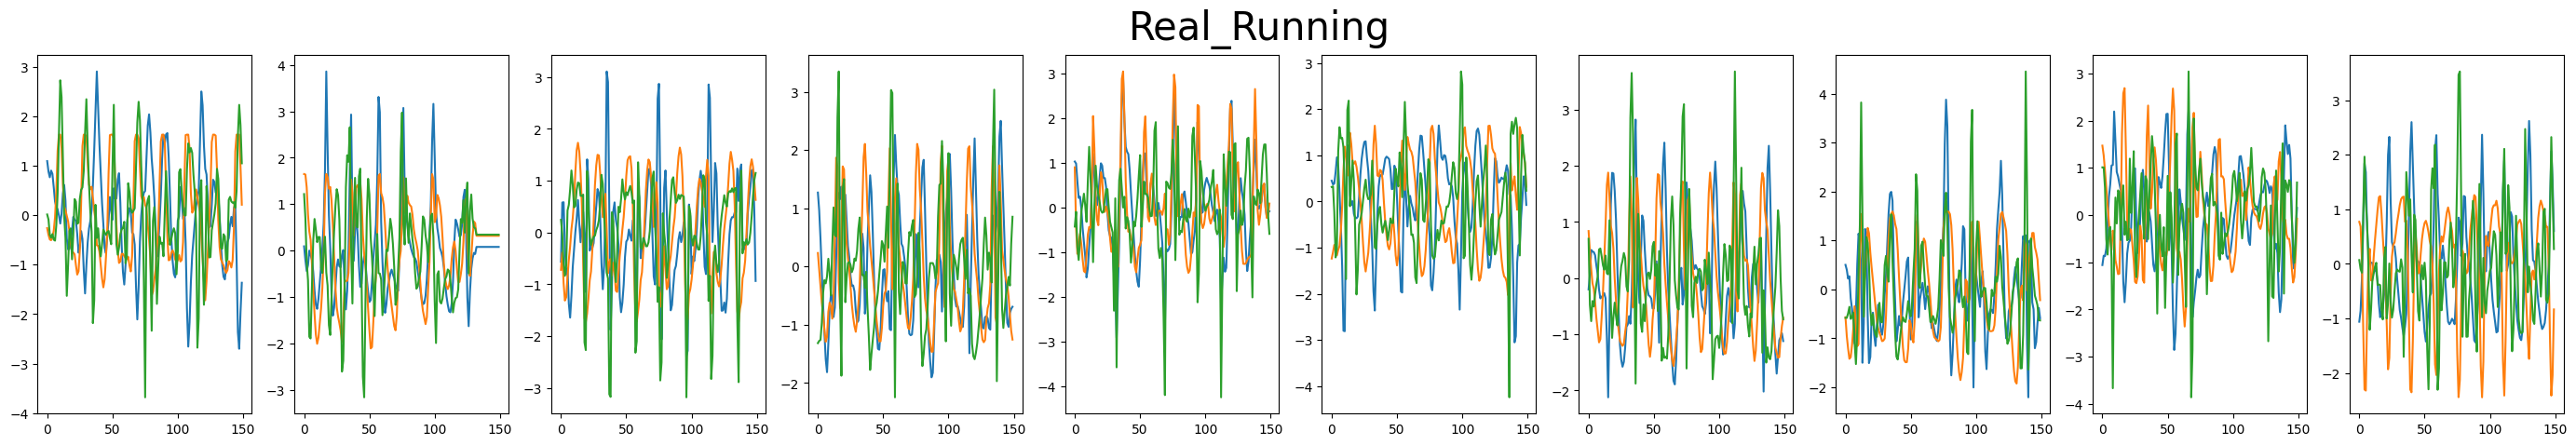

In [5]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Real_Running', fontsize=30)
for i in range(10):
    axs[i].plot(real_running[i][0][:])
    axs[i].plot(real_running[i][1][:])
    axs[i].plot(real_running[i][2][:])

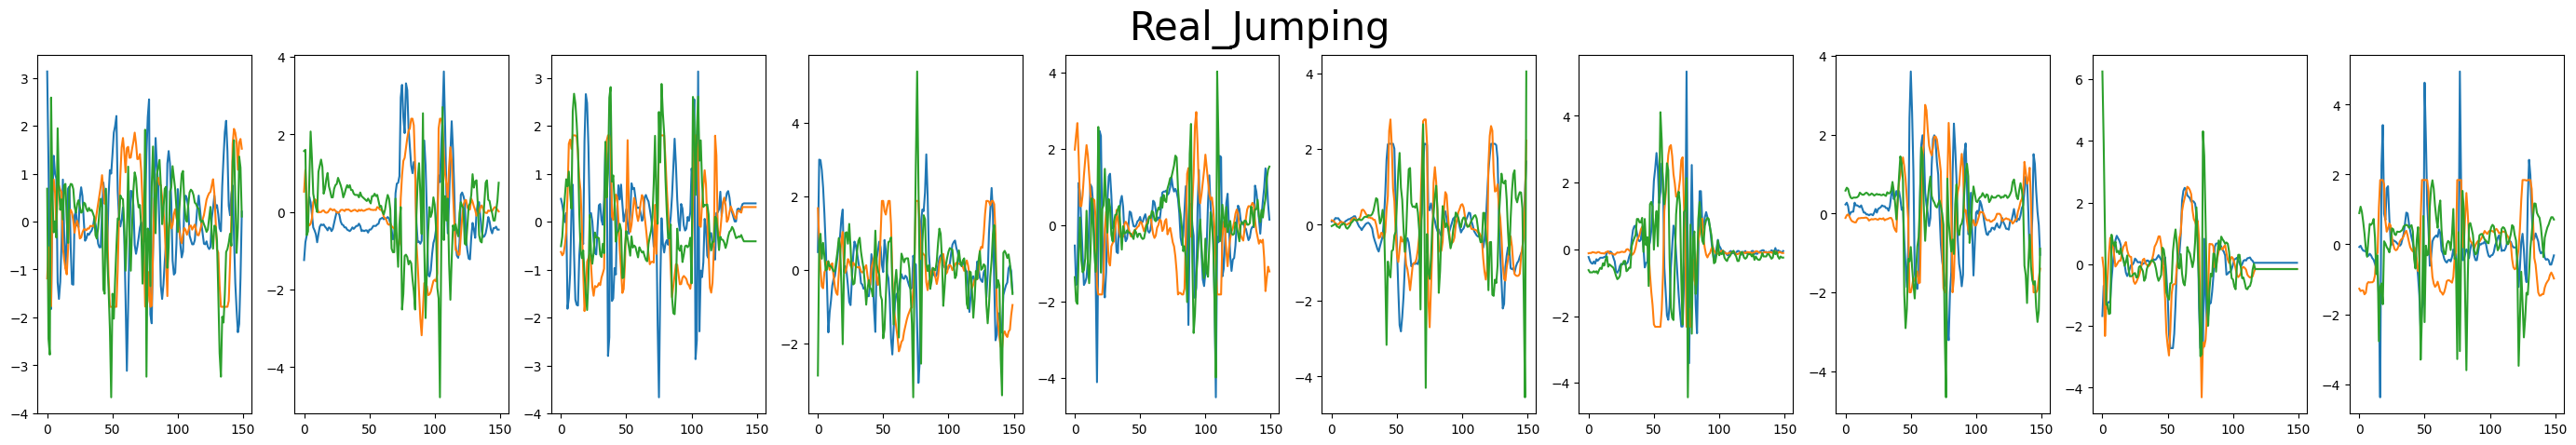

In [6]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Real_Jumping', fontsize=30)
for i in range(10):
    axs[i].plot(real_jumping[i][0][:])
    axs[i].plot(real_jumping[i][1][:])
    axs[i].plot(real_jumping[i][2][:])

### Step 2: Load synthetic running and jumping data

In [7]:
from LoadSyntheticRunningJumping import *
from torch.utils import data

In [8]:
syn_data = Synthetic_Dataset()

(2000, 3, 1, 150)
(2000, 1)


In [9]:
syn_data_loader = data.DataLoader(syn_data, batch_size=1, num_workers=1, shuffle=True)

In [10]:
import matplotlib.pyplot as plt
syn_running = []
syn_jumping = []

for i, (syn_sig, label) in enumerate(syn_data_loader):
    syn_sig = syn_sig.cpu().detach().numpy()
    sig = syn_sig.reshape(syn_sig.shape[1], syn_sig.shape[3])
    if label[0] == 0:
        syn_running.append(sig)
    elif label[0] == 1:
        syn_jumping.append(sig)

syn_running = np.array(syn_running)
syn_jumping = np.array(syn_jumping)
print(syn_running.shape)
print(syn_jumping.shape)

(1000, 3, 150)
(1000, 3, 150)


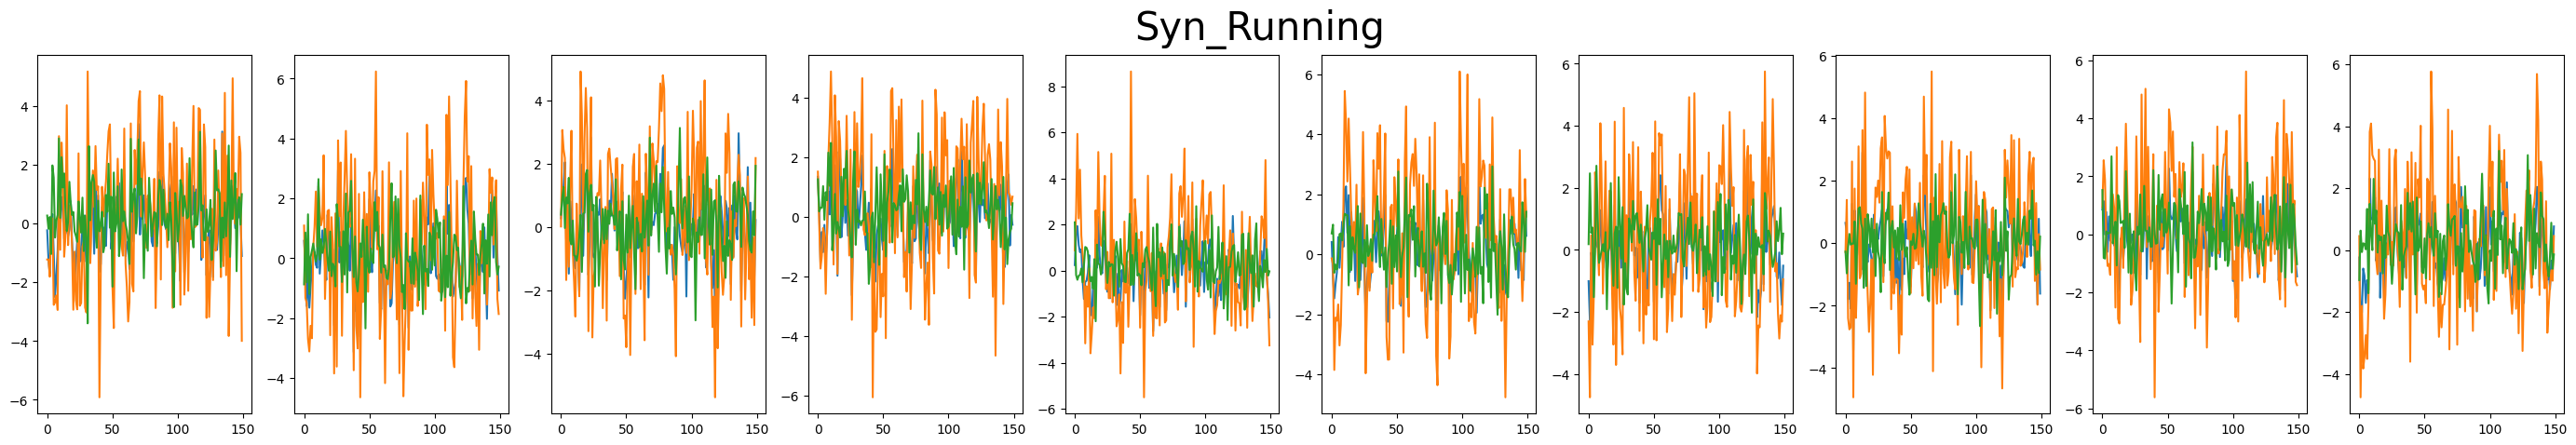

In [11]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Syn_Running', fontsize=30)
for i in range(10):
    axs[i].plot(syn_running[i][0][:])
    axs[i].plot(syn_running[i][1][:])
    axs[i].plot(syn_running[i][2][:])

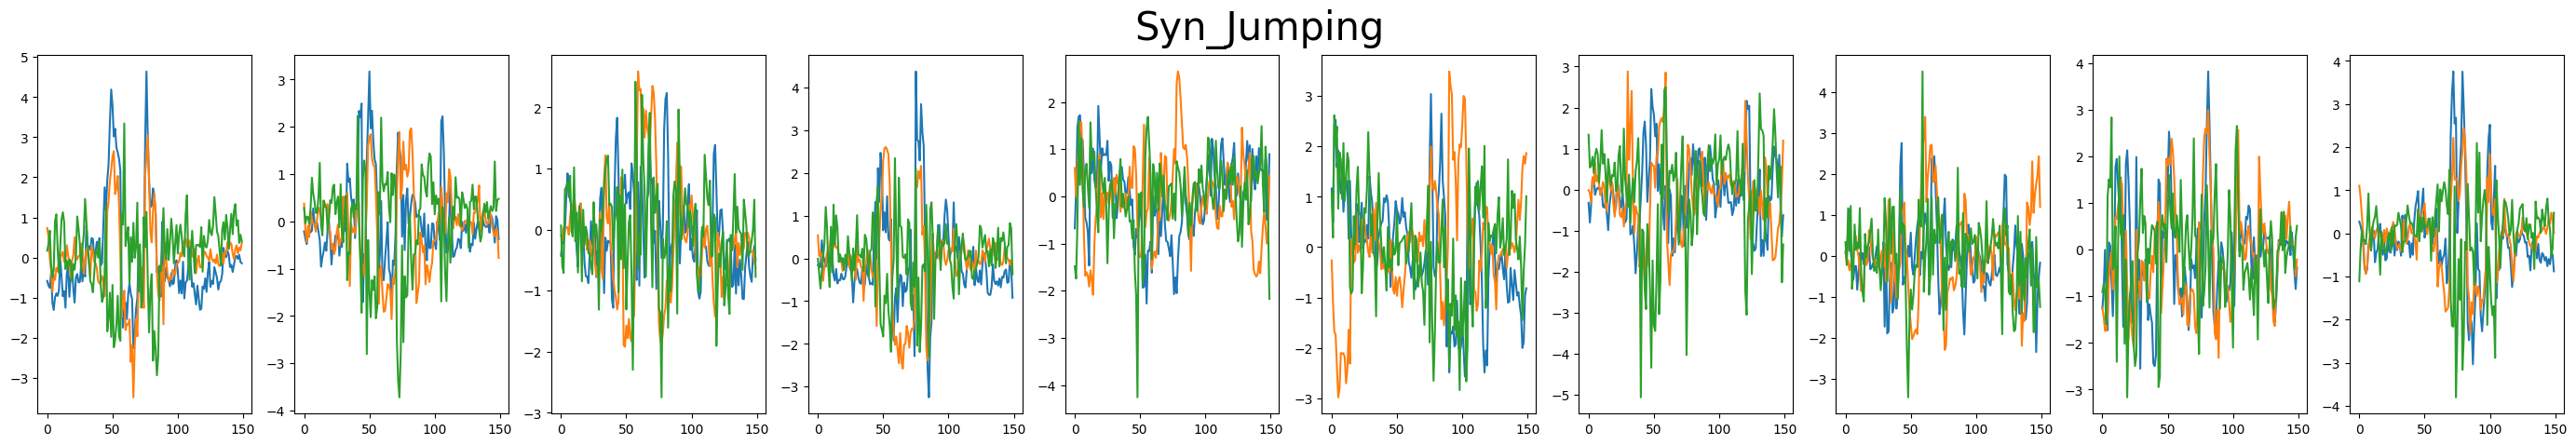

In [12]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Syn_Jumping', fontsize=30)
for i in range(10):
    axs[i].plot(syn_jumping[i][0][:])
    axs[i].plot(syn_jumping[i][1][:])
    axs[i].plot(syn_jumping[i][2][:])

### Step 3: PCA

In [13]:
print(real_running.shape)
print(real_jumping.shape)
print(syn_running.shape)
print(syn_jumping.shape)

(600, 3, 150)
(600, 3, 150)
(1000, 3, 150)
(1000, 3, 150)


In [14]:
real_running = np.transpose(real_running, (0, 2, 1))
real_jumping = np.transpose(real_jumping, (0, 2, 1))
syn_running = np.transpose(syn_running, (0, 2, 1))
syn_jumping = np.transpose(syn_jumping, (0, 2, 1))
print(real_running.shape)
print(real_jumping.shape)
print(syn_running.shape)
print(syn_jumping.shape)

(600, 150, 3)
(600, 150, 3)
(1000, 150, 3)
(1000, 150, 3)


In [15]:
from visualizationMetrics import visualization

/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: inval

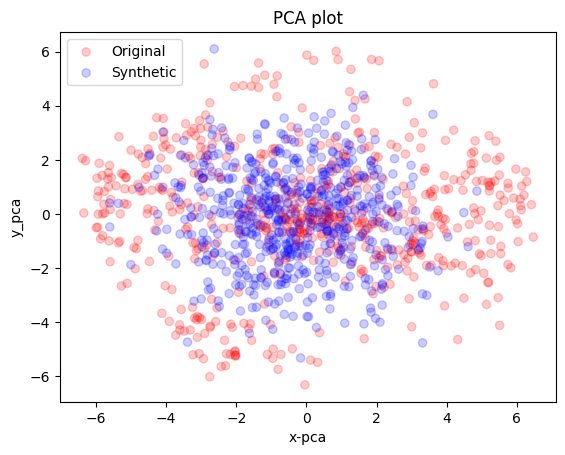

In [16]:
visualization(real_running, syn_running, 'pca', 'Running-pca')

In [17]:
#visualization(real_running, syn_jumping, 'pca')

/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: inval

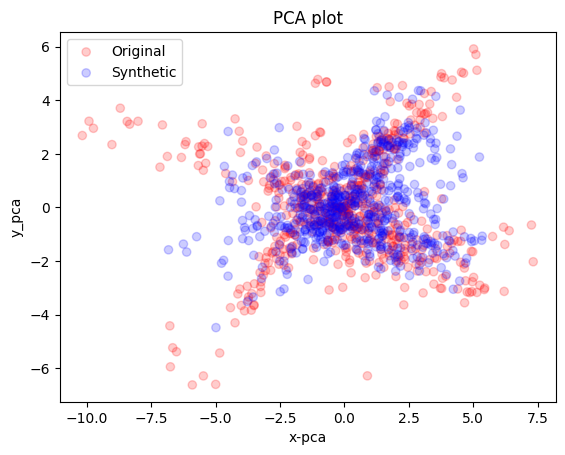

In [18]:
visualization(real_jumping, syn_jumping, 'pca', 'Jumping-pca')

In [19]:
#visualization(real_jumping, syn_running, 'pca')

/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: inval

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.615936
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.350967
[t-SNE] KL divergence after 1000 iterations: 1.666618


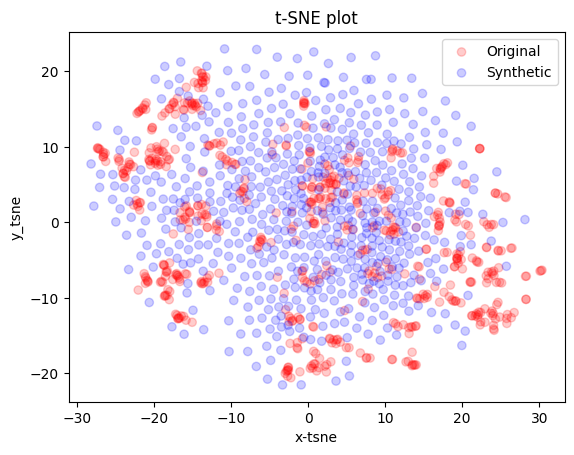

In [20]:
visualization(real_running, syn_running, 'tsne', 'Running-tsne')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.365428


/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: inval

[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.922455
[t-SNE] KL divergence after 1000 iterations: 1.196501


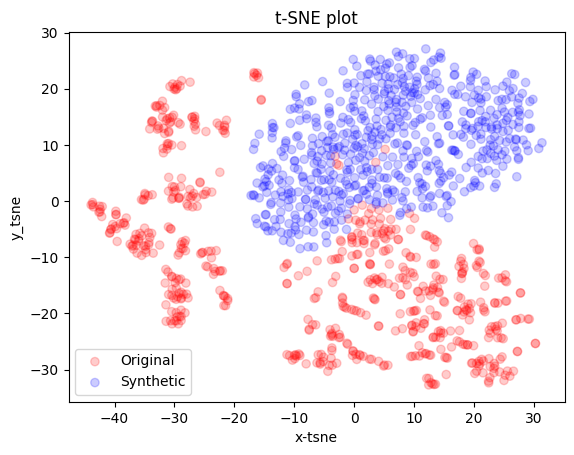

In [21]:
visualization(real_running, syn_jumping, 'tsne', 'Real-R_Syn_J-tsne')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.215256


/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: inval

[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.936111
[t-SNE] KL divergence after 1000 iterations: 1.636438


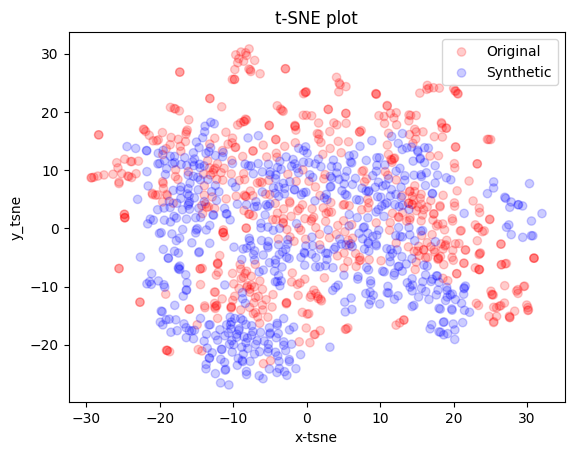

In [22]:
visualization(real_jumping, syn_jumping, 'tsne', 'Jumping-tsne')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.606015


/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/yenping/miniforge3/envs/tts-gan/lib/python3.11/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: inval

[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.332275
[t-SNE] KL divergence after 1000 iterations: 1.998891


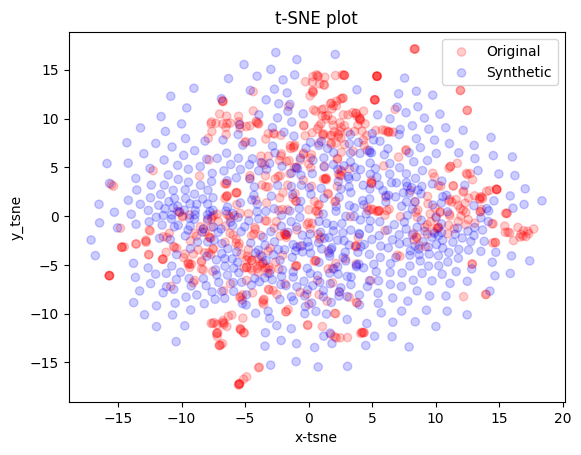

In [23]:
visualization(real_jumping, syn_running, 'tsne', 'Real-J_Syn_R-tsne')